# ___Imports___

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score, accuracy_score, recall_score, precision_score, classification_report
from sklearn.pipeline import make_pipeline
from keras.models import Sequential
from keras.layers import Dense, LSTM


# ___Load Data___

In [3]:
# load data for nasa
data = pd.read_csv('../data/ALL_DATA.csv')
print(data.columns)


print(data.head())
print(np.shape(data))


Index(['id', 'class', 'mass', 'fall', 'year', 'lat', 'long', 'Elevation'], dtype='object')
      id        class      mass  fall    year       lat       long   Elevation
0    1.0           L5      21.0  Fell  1880.0  50.77500    6.08333  333.548386
1    2.0           H6     720.0  Fell  1951.0  56.18333   10.23333  333.548386
2    6.0          EH4  107000.0  Fell  1952.0  54.21667 -113.00000  333.548386
3   10.0  Acapulcoite    1914.0  Fell  1976.0  16.88333  -99.90000  333.548386
4  370.0           L6     780.0  Fell  1902.0 -33.16667  -64.95000  333.548386
(88705, 8)


# ___Scaling (10%)___

In [4]:
# *****************************
# HIGHLY IMPORTANT
# *****************************

# Sample data
print("Original Data Stats: \n")
print(data.describe())

print('\n--------\n')

print("New Sample Data Stats: \n")
# all_data['year'].fillna(0).astype(int)
# all_data['mass'].fillna(0).astype(int)


data = data.sample(frac=0.1)  # 10% sample set
print(data.describe())


Original Data Stats: 

                 id          mass          year           lat          long  \
count  88705.000000  8.870500e+04  88705.000000  88705.000000  88705.000000   
mean   37088.348053  1.327808e+04   1999.326928      2.815932     38.871848   
std    23580.335315  4.121868e+05     21.440582     50.503054     70.303823   
min        1.000000  0.000000e+00    301.000000    -87.366670   -174.833333   
25%    16281.000000  3.000000e+01   1998.000000    -38.630000      8.192500   
50%    34337.000000  1.200000e+04   2002.000000     23.000000     26.000000   
75%    56576.000000  1.327808e+04   2008.000000     45.968889     58.407850   
max    80694.000000  6.000000e+07   2501.000000     82.569167    354.473330   

          Elevation  
count  88705.000000  
mean     333.548386  
std      375.385323  
min      -11.000000  
25%      100.000000  
50%      333.548386  
75%      333.548386  
max     9999.000000  

--------

New Sample Data Stats: 

                 id          ma

In [5]:
all_data = pd.DataFrame(data=data)
print(all_data)

# target variable
target = data.year
# features
features = data.drop(['year'], axis=1)


# print(data.head())
features.columns

            id         class          mass   fall    year        lat  \
35279  22124.0           CK4      1.600000  Found  1999.0 -84.000000   
4279    3990.0            L6     27.200000  Found  1988.0 -72.000000   
83244  54198.0           NaN  13278.078549    NaN  2004.0  50.750000   
44438  38757.0            H4      4.010000  Found  1998.0   0.000000   
39693  25783.0            H4      8.620000  Found  1979.0 -71.500000   
...        ...           ...           ...    ...     ...        ...   
56943  43485.0           NaN  13278.078549    NaN  1999.0  30.610000   
37718  23722.0  Iron, IVA-an  98000.000000  Found  1724.0  50.500000   
39986  26093.0            L5     18.700000  Found  1979.0 -71.500000   
66464  27627.0           NaN  13278.078549    NaN  2000.0  49.477222   
36481  22840.0         LL5/6    538.000000  Found  1997.0   2.815932   

             long   Elevation  
35279  168.000000  333.548386  
4279    26.000000  333.548386  
83244    3.600000    0.000000  
44438  

Index(['id', 'class', 'mass', 'fall', 'lat', 'long', 'Elevation'], dtype='object')

# ___One Hot Encoding___

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# ### Categorical data to be converted to numeric data
# class_data = list(all_data['class'])
# fall_data = list(all_data['fall'])

class_data = list(features['class'])
fall_data = list(features['fall'])


### integer mapping using LabelEncoder
le = LabelEncoder()
class_encoded = le.fit_transform(class_data)
fall_encoded = le.fit_transform(fall_data)
class_encoded = class_encoded.reshape(len(class_encoded), 1)
fall_encoded = fall_encoded.reshape(len(fall_encoded), 1)

### One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded_class = onehot_encoder.fit_transform(class_encoded)
onehot_encoded_fall = onehot_encoder.fit_transform(fall_encoded)

# print(onehot_encoded_class)
# all_data['class'] = onehot_encoded_class
# print(all_data['class'])

# print('\n\n\n')
# print(onehot_encoded_fall)
# all_data['fall'] = onehot_encoded_fall
# print(all_data['fall'])

print(onehot_encoded_class)
features['class'] = onehot_encoded_class
print(features['class'])

print('\n\n\n')
print(onehot_encoded_fall)
features['fall'] = onehot_encoded_fall
print(features['fall'])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
35279    0.0
4279     0.0
83244    0.0
44438    0.0
39693    0.0
        ... 
56943    0.0
37718    0.0
39986    0.0
66464    0.0
36481    0.0
Name: class, Length: 8870, dtype: float64




[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
35279    0.0
4279     0.0
83244    0.0
44438    0.0
39693    0.0
        ... 
56943    0.0
37718    0.0
39986    0.0
66464    0.0
36481    0.0
Name: fall, Length: 8870, dtype: float64


In [7]:
# print(all_data.head)
print(features.head)

<bound method NDFrame.head of             id  class          mass  fall        lat        long   Elevation
35279  22124.0    0.0      1.600000   0.0 -84.000000  168.000000  333.548386
4279    3990.0    0.0     27.200000   0.0 -72.000000   26.000000  333.548386
83244  54198.0    0.0  13278.078549   0.0  50.750000    3.600000    0.000000
44438  38757.0    0.0      4.010000   0.0   0.000000    0.000000  333.548386
39693  25783.0    0.0      8.620000   0.0 -71.500000   35.666670  333.548386
...        ...    ...           ...   ...        ...         ...         ...
56943  43485.0    0.0  13278.078549   0.0  30.610000 -103.947222    0.000000
37718  23722.0    0.0  98000.000000   0.0  50.500000   12.500000  333.548386
39986  26093.0    0.0     18.700000   0.0 -71.500000   35.666670  333.548386
66464  27627.0    0.0  13278.078549   0.0  49.477222   18.728056  500.000000
36481  22840.0    0.0    538.000000   0.0   2.815932   38.871848  333.548386

[8870 rows x 7 columns]>


# ___Scaling___

In [9]:
print("Value distribution of features: ")
print(list(features.iloc[0]))

min_max = MinMaxScaler(feature_range = (0, 1))
data_min_max = min_max.fit_transform(features)
print('\n')
print("Value distribution after min max: ")
print(list(data_min_max[0]))

Value distribution of features: 
[22124.0, 0.0, 1.6, 0.0, -84.0, 168.0, 333.54838634618517]


Value distribution after min max: 
[0.2741625667653948, 0.0, 3.2e-08, 0.0, 0.020878573211816742, 0.9707409381410155, 0.07546343582492877]


# ___Bar Plot of year___

1999.0    690
2000.0    634
2003.0    511
2001.0    486
2002.0    423
         ... 
1905.0      1
1863.0      1
601.0       1
1846.0      1
1848.0      1
Name: year, Length: 155, dtype: int64


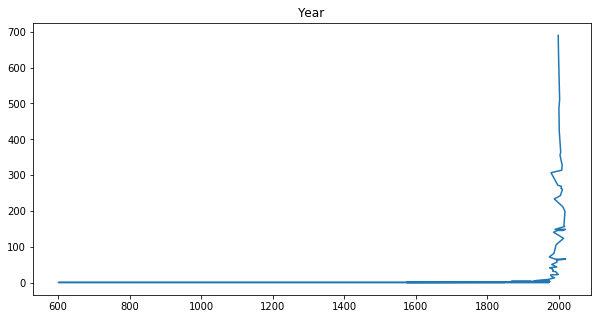

In [21]:
plt.figure(figsize=(10,5))
plt.title('Year')
count = target.value_counts()

print(count)
plt.plot(count)

# ___Build Model___

In [ ]:
# def data_model(data, target):  #x,y
#     X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
#     pipeline = make_pipeline(LinearRegression())
#     model = pipeline.fit(X_train, y_train)
    
#     return (X_test, y_test, model)



X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# ___Compile Model___

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# ___Train Model___

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

# ___Model Evaluation___